## CREDIT CARD FRAUD DETECTION SYSTEM
### ANSHIKA GUPTA 20CSU301
### RITIKA SHARMA 20CSU357
### MANYA JAIN 20CSU375

#### PROBLEM STATEMENT:
#### It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.



## 1. IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier

import warnings
import time

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

# 2. EXPLORATORY DATA ANALYSIS

## DATA PREPROCESSING

In [2]:
# Loading the dataset into pandas dataframe
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### OBSERVATIONS
#### 1. There are 31 columns in the dataset, 28 of them being the output of PCA (V1 — V28), as well as values for amount and time.
#### 2. Our response variable is class, with 0 being the result for no fraud, and 1 being the result for fraud. 
#### 3. The shape of the data tells us that there are 284807 entries and 31 columns.
#### 4. As per the count per column, we have no null values

In [5]:
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print('Total number of Trnsactions are ',Total_transactions)
print('Number of Normal Transactions are ',normal)
print('Number of fraudulent Transactions are ',fraudulent)
print('Percentage of fraud Transactions is ',fraud_percentage)


Total number of Trnsactions are  284807
Number of Normal Transactions are  284315
Number of fraudulent Transactions are  492
Percentage of fraud Transactions is  0.17


<AxesSubplot:xlabel='Class', ylabel='count'>

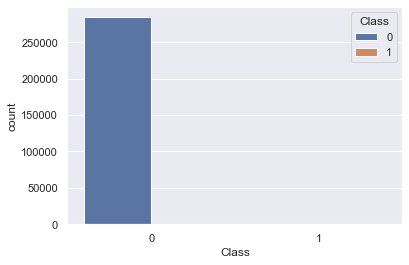

In [6]:
sns.countplot(x=data.Class, hue=data.Class)

####  As you can see, our dataset is highly imbalanced, as an overwhelming majority of our data is in the 0 class. This is a problem because we have to give the same amount of opportunities for the model to train from both classes.

#### #Next, we can plot the distribution of both amount and time over the two classes. We can do this by indexing the dataframe to extract the column we want to plot.

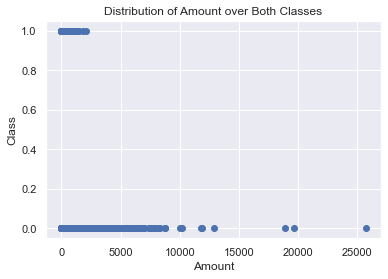

In [7]:
plt.title("Distribution of Amount over Both Classes")
plt.xlabel("Amount")
plt.ylabel("Class")

plt.scatter(data["Amount"],data["Class"])

#### We can see that fraudulent entries tend to have lower amount values, as opposed to non-fraudulent ones. It is also noteworthy that values for non-fraudulent amounts aren’t spread evenly, as there are larger intervals between the higher values in this variable.

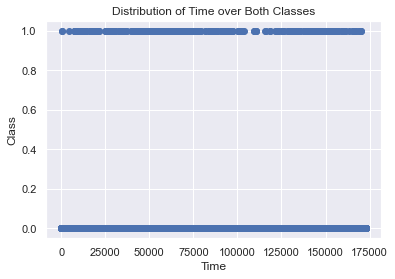

In [8]:
plt.title("Distribution of Time over Both Classes")
plt.xlabel("Time")
plt.ylabel("Class")

plt.scatter(data["Time"],data["Class"])

#### In terms of time, there doesn’t seem to be a differentiation between the two classes, as those values are consistent among both fraudulent and non-fraudulent entries. This makes sense, because as mentioned earlier, the time feature is representing the seconds elapsed since the first transaction. Hence, the time variable will continue to increase. Assuming that the fraudulent transactions are not all isolated from the non-fraudulent ones in terms of time, they will both have continuous time values. Since we do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.



#### We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.



<AxesSubplot:>

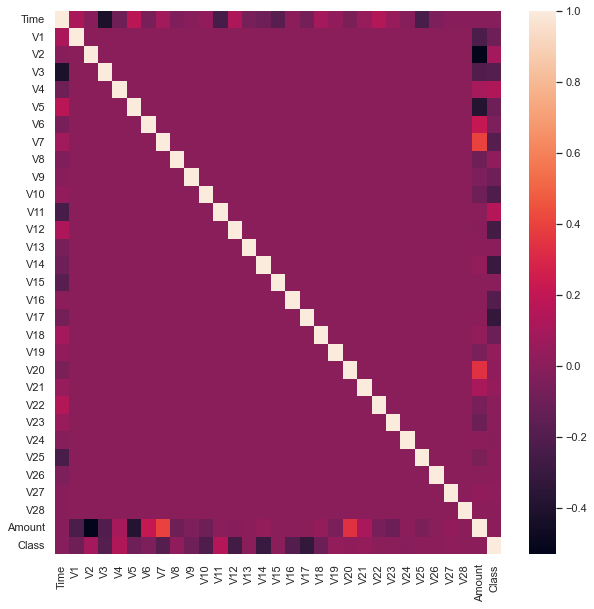

In [9]:
correlation = data.corr()
fig = plt.subplots(figsize=(10,10)) 
sns.heatmap(correlation, vmax= 1 )

#### 1.From this correlation matrix, we can see that there are no major correlations between the features in the dataset. Most of the relationships fall between -0.2 and 0.2. Though, there are some exceptions, particularly in analyzing the correlation between the amount feature, V7, and V20.
#### 2. Another observation is the minimal relationship between the features and class. This can be attributed to the imbalanced nature of the data, which can downplay the importance of certain features.

#### HANDLING TIME COLUMN

In [10]:
#Since this column is not relevant to the training anymore we can easily drop it
data.drop(['Time'], axis=1, inplace=True)


In [11]:
#Removing the duplicate entries
data.drop_duplicates(inplace=True)

In [12]:
data.shape

(275663, 30)

#### HANDLING AMOUNT COLUMN

In [13]:
data['Amount-Bins'] = ''

In [14]:
def make_bins(predictor, size=50):
    '''Takes the predictor (a series or a dataframe of single predictor) and size of bins. Returns bins and bin labels'''
    bins = np.linspace(predictor.min(), predictor.max(), num=size)
    bin_labels = []
    # Index of the final element in bins list
    bins_last_index = bins.shape[0] - 1

    for id, val in enumerate(bins):
        if id == bins_last_index:
            continue
        val_to_put = str(int(bins[id])) + ' to ' + str(int(bins[id + 1]))
        bin_labels.append(val_to_put)
    
    return bins, bin_labels

In [15]:
bins, bin_labels = make_bins(data.Amount, size=10)

In [16]:
data['Amount-Bins'] = pd.cut(data.Amount, bins=bins,labels=bin_labels, include_lowest=True)
data['Amount-Bins'].head().to_frame()

,Amount-Bins
0,0 to 2854
1,0 to 2854
2,0 to 2854
3,0 to 2854
4,0 to 2854


In [17]:
data['Amount-Bins'].value_counts()

0 to 2854         275343
2854 to 5709         282
5709 to 8563          28
8563 to 11418          4
11418 to 14272         3
17127 to 19982         2
22836 to 25691         1
14272 to 17127         0
19982 to 22836         0
Name: Amount-Bins, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0 to 2854'),
  Text(1, 0, '2854 to 5709'),
  Text(2, 0, '5709 to 8563'),
  Text(3, 0, '8563 to 11418'),
  Text(4, 0, '11418 to 14272'),
  Text(5, 0, '14272 to 17127'),
  Text(6, 0, '17127 to 19982'),
  Text(7, 0, '19982 to 22836'),
  Text(8, 0, '22836 to 25691')])

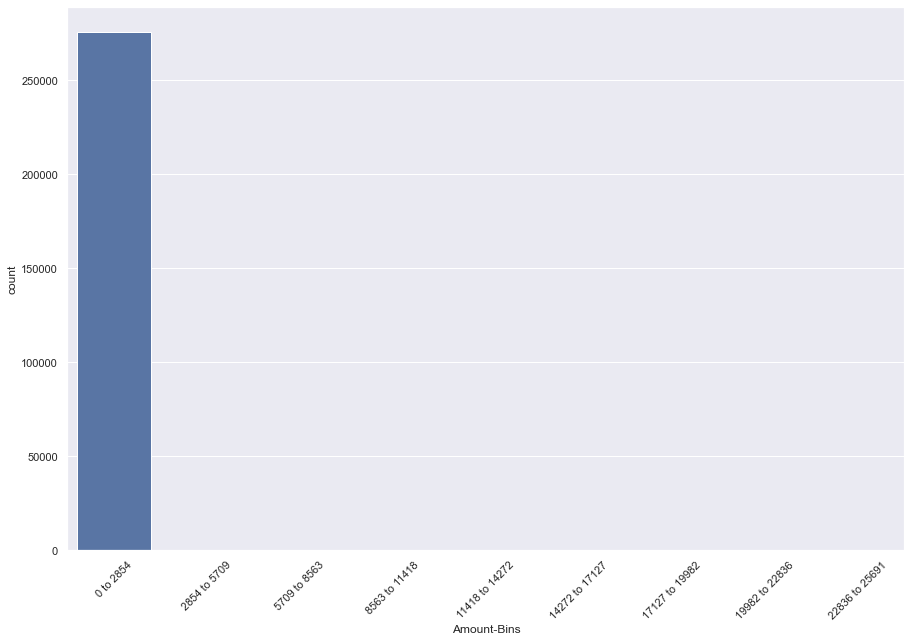

In [18]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=data)
plt.xticks(rotation=45)

In [19]:
data_encoded = pd.get_dummies(data=data, columns=['Amount-Bins'])
data = data_encoded.copy()

# 3. TRAIN AND TEST SPLIT

#### 1. Before splitting train & test — we need to define dependent and independent variables. The dependent variable is also known as X and the independent variable is known as Y. 
#### 2. We can split the data into training and testing values with a test size of 30%.



In [20]:
X=data.drop(['Class'], axis=1)
Y=data["Class"]
print(X.shape)
print(Y.shape)
#getting just the values for the sake of processing (its a numpy array with no columns)
X_data=X.values
Y_data=Y.values
X_train_Before, X_test, Y_train_Before, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

(275663, 38)
(275663,)


In [21]:
#Data Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in X_train_Before:
    scaler = StandardScaler()
    X_train_Before[i] = scaler.fit_transform(X_train_Before[i].values.reshape(-1,1))
    X_test[i] = scaler.transform(X_test[i].values.reshape(-1,1))

In [22]:
data.describe

<bound method NDFrame.describe of                V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...  Class  \
0       0.239599  0.098698  0.363787  0

#### We now have two different data set — Train data we will be used for training our model and the data which is unseen will be used for testing. 
#### Now, If you look at the data, you will see that the amount values are significantly higher than the entries for other features. For example, in the first entry in data.head(), the amount value is 149.62, which is significantly different from V1 which is approximately -1.36. To resolve this problem, we will use the standard scaler. By scaling the variable, the model’s efficiency will increase.



### Balancing the Data with Borderline-SMOTE
#### Now, we will need to balance our data to ensure that the model has enough exposure to BOTH classes! This ensures that the model won’t be biased towards the non-fraudulent values, as currently there are more than 280,000 entries with a class of 0, while there are only 492 fraudulent values.
#### To change the number of values in class 1, there are two possible methods: random undersampling (reduces the number of entries from the majority class) and synthetic oversampling (synthetically generating new entries for the minority class). Because we want to provide our model with as much data as possible, we will use a technique called Borderline-SMOTE (Borderline Synthetic Minority Oversampling Technique). The reason that Borderline-SMOTE was used as opposed to SMOTE is that it takes synthetically generates data in between different elements in the minority class, while ignoring outliers. Outliers can be defined as features which neighbour more majority points, than minority ones.

In [23]:
#Balancing with Borderline_SMOTE
from imblearn.over_sampling import BorderlineSMOTE
borderlineSMOTE = BorderlineSMOTE(k_neighbors = 10, random_state = 42)
X_train, Y_train = borderlineSMOTE.fit_resample(X_train_Before,Y_train_Before)

In [24]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(385254, 38) (385254,)
(82699, 38) (82699,)


<AxesSubplot:xlabel='Class', ylabel='count'>

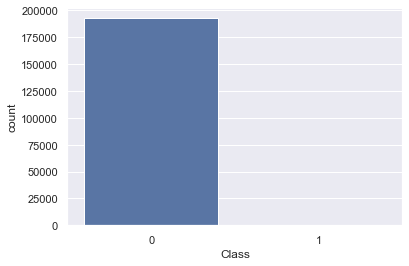

In [25]:
#Unbalanced training data distribution
sns.countplot(x=Y_train_Before)


<AxesSubplot:xlabel='Class', ylabel='count'>

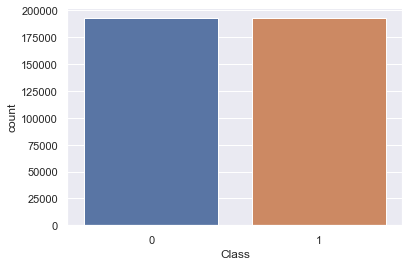

In [26]:
#Balanced training data distribution
sns.countplot(x=Y_train)

#### Our dataset is now balanced! This ensures that our model can see the same amount of elements from each of the classes.

# 4. APPLYING MACHINE LEARNING MODELS

Let's apply different Machine Learning Algorithms then compare their metrics to select the most suitable ML algorithm. Algorithms to be used are:
1. Logistic Regression 
2. Naive Bayes
3. K-Nearest Neighbors
4. Random Forest

The metrics we'll use initially are:
* Accuracy
* Precision
* F1-Score

The main metrics we'll look at are (Reason is mentioned later):
* Recall
* AUC/RUC Curve

#### Before we start building models, it is crucial to define the performance metrics we will be using. As our validation data is imbalanced, if the model would predict the majority class every time, our model will receive an accuracy that is significantly skewed without consideration for the minority class. Hence, we will be using precision, recall, and F1 score.

#### 1) LOGISTIC REGRESSION

Before going further into metrics, let's first decide either Type-I or Type-II error is more important to consider.<br><br>
```Type-I  Error or False Positives:``` False Positives are the ones which are actually not fraud but the prediction said that they are fraud.<br>
```Type-II Error or False Negatives:``` False Negatives are the ones which are actually fraud but the system said that they aren't.

Well, we can say that Type-II Error is more significant because we don't want system to have a fraudulent credit card because that can be more dangerous.

So, for Type-II Error, We can say that **recall** is the important metric.

In [27]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [28]:
# Predictions on training and testing data
lr_train = lr.predict(X_train)
lr_test = lr.predict(X_test)

In [29]:
print('tn - True Negative')
print('tp - True Positive')
print('fn - False Negative')
print('fp - False Positive')

tn, fp, fn, tp = confusion_matrix(Y_test, lr_test).ravel()
c_matrix = pd.DataFrame({'Predicted Fraud': [tp, fp],'Predicted Not Fraud': [fn, tn]}, index=['Fraud', 'Not Fraud'])
c_matrix

tn - True Negative
tp - True Positive
fn - False Negative
fp - False Positive


,Predicted Fraud,Predicted Not Fraud
Fraud,117,19
Not Fraud,949,81614


<AxesSubplot:>

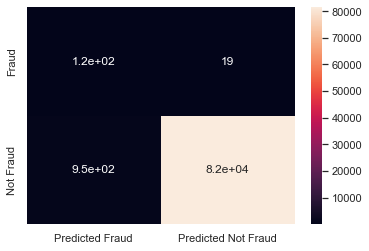

In [30]:
sns.heatmap(c_matrix, annot=True )

#### Heatmap also suggests that the data is highly imbalanced.

In [31]:
lr_accuracy = accuracy_score(Y_test, lr_test)
lr_accuracy

0.9882949007847737

#### We can see here that accuracy is great. Around 98.8%.
#### But we know that the dataset is highly unbalanced and accuracy takes into account the whole confusion matrix. So we can say that this measure is not suitable.

In [32]:
lr_precision = precision_score(Y_test, lr_test)
lr_precision

0.10975609756097561

In [33]:
lr_recall = recall_score(Y_test, lr_test)
lr_recall

0.8602941176470589

#### Recall is very low in case of logistic regression. However, we may try to increase it by increasing the complexity of the model.
#### Although, let's check the recall for training dataset to get the idea of any overfitting we may be having.

In [34]:
lr_recall_train = recall_score(Y_train, lr_train)
lr_recall_train

0.9850955473531748

In [35]:
lr_f1 = f1_score(Y_test, lr_test)
lr_f1

0.19467554076539104

In [36]:
print(classification_report(Y_test, lr_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     82563
           1       0.11      0.86      0.19       136

    accuracy                           0.99     82699
   macro avg       0.55      0.92      0.59     82699
weighted avg       1.00      0.99      0.99     82699



#### Now, for the ROC Curve, we need the probabilites of Fraud happening (which is the probability of occurance of 1)

In [37]:
lr_pred_test_prob = lr.predict_proba(X_test)[:, 1]

In [38]:
fpr, tpr, threshold = roc_curve(Y_test, lr_pred_test_prob)

In [39]:
lr_auc = roc_auc_score(Y_test, lr_pred_test_prob)
lr_auc

0.953600717384443

In [40]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

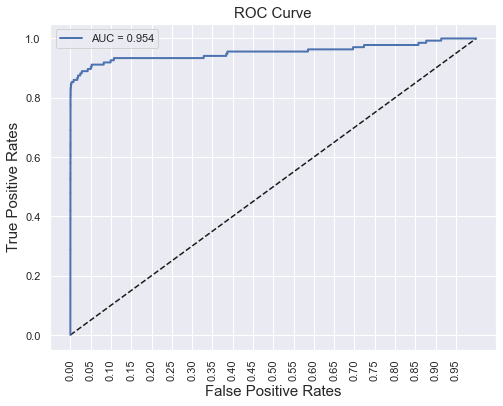

In [41]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % lr_auc)

#### AUC is quite good. i.e. 0.965. Based on the data being highly imbalanced, we'll only check the AUC metric in later algorithms.

#### MODEL COMPLEXITY
#### Let's try to train the Logistic Regression models on the 2nd degree of polynomials. Not going further 2nd degree because features are already too much. Otherwise, computer gives the MemoryError.


In [42]:
# Getting the polynomial features
poly = PolynomialFeatures(degree=2)
xtrain_poly = poly.fit_transform(X_train)
xtest_poly = poly.fit_transform(X_test)

# Training the model
model = LogisticRegression()
model.fit(xtrain_poly, Y_train)

# Getting the probabilities
train_prob = model.predict_proba(xtrain_poly)[:, 1]
test_prob = model.predict_proba(xtest_poly)[:, 1]

# Computing the ROC Score
roc_auc_score(Y_train, train_prob), roc_auc_score(Y_test, test_prob)

(0.9998495565891604, 0.9404419156565647)

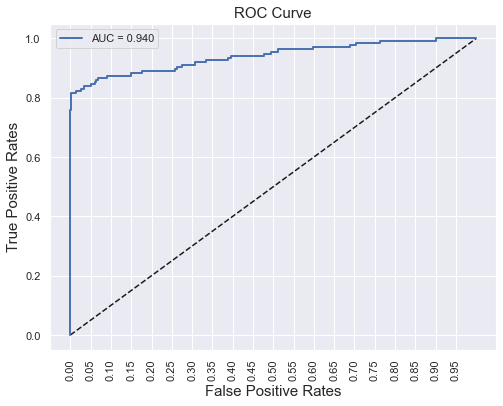

In [43]:
fpr_poly, tpr_poly, threshold_poly = roc_curve(Y_test, test_prob)
plot_roc_curve(fpr=fpr_poly, tpr=tpr_poly, label='AUC = %.3f' %  roc_auc_score(Y_test, test_prob))

#### First degree is better in Logistic Regression case which gives 0.954 AUC Score.

In [44]:
recall_score(Y_test, model.predict(xtest_poly))

0.8088235294117647

#### 3)NAIVE BAYES

In [45]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [46]:
nb_pred = nb.predict(X_test)
nb_pred_proba = nb.predict_proba(X_test)[:, 1]

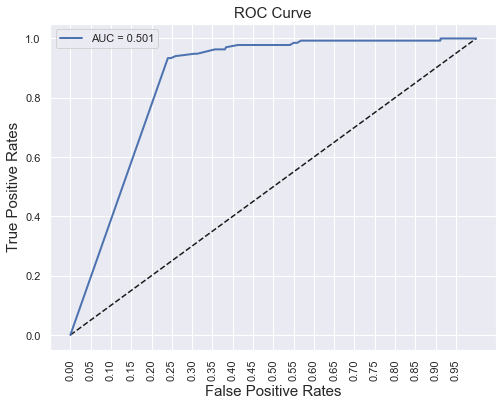

In [47]:
nb_auc = roc_auc_score(Y_test, nb_pred)
fpr, tpr, threshold = roc_curve(Y_test, nb_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % nb_auc)

In [48]:
nb_recall = recall_score(Y_test, nb_pred)
nb_recall

1.0

In [49]:
nb_accuracy = accuracy_score(Y_test, nb_pred)
nb_accuracy

0.0027207100448614855

In [50]:
nb_precision = precision_score(Y_test, nb_pred)
nb_precision

0.0016462897954242829

In [51]:
nb_f1 = f1_score(Y_test, nb_pred)

In [52]:
print(classification_report(Y_test, nb_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     82563
           1       0.00      1.00      0.00       136

    accuracy                           0.00     82699
   macro avg       0.50      0.50      0.00     82699
weighted avg       1.00      0.00      0.00     82699



#### 3) KNN

In [53]:
full_data = pd.read_csv("creditcard.csv")
full_features = full_data.drop(["Time","Class"], axis = 1)
full_labels = pd.DataFrame(full_data[["Class"]])

full_features_array = full_features.values
full_labels_array = full_labels.values

In [54]:
#normalizing data
train_features, test_features, train_labels, test_labels = train_test_split(full_features_array, full_labels_array, train_size = 0.90)
train_features = normalize(train_features)
test_features = normalize(test_features)

In [55]:
kmeans = KMeans(n_clusters = 2, random_state = 0, algorithm = "elkan", max_iter = 10000)
kmeans.fit(train_features)
kmeans_predicted_train_labels = kmeans.predict(train_features)
# fn tp
print("tn --> true negatives")
print("fp --> false positives")
print("fn --> false negatives")
print("tp --> true positives")

tn --> true negatives
fp --> false positives
fn --> false negatives
tp --> true positives


In [56]:
tn, fp, fn, tp = confusion_matrix(train_labels, kmeans_predicted_train_labels).ravel()
reassignflag = False
if tn + tp < fn + fp:
	# Clustering is opposite of Original Classification
	reassignflag = True
kmeans_predicted_test_labels = kmeans.predict(test_features)
if reassignflag:
	kmeans_predicted_test_labels = 1 - kmeans_predicted_test_labels

In [57]:
# Calculating Confusion Matrix for kmeans
tn, fp, fn, tp = confusion_matrix(test_labels, kmeans_predicted_test_labels).ravel()

# Scoring kmeans
kmeans_accuracy_score = accuracy_score(test_labels,kmeans_predicted_test_labels)
kmeans_precison_score = precision_score(test_labels,kmeans_predicted_test_labels)
kmeans_recall_score = recall_score(test_labels,kmeans_predicted_test_labels)
kmeans_f1_score = f1_score(test_labels,kmeans_predicted_test_labels)

In [58]:
# Printing
print("\nK-Means")
print("Confusion Matrix")
print("tn =", tn, "fp =",fp)
print("fn =", fn, "tp =",tp)
print("Scores")
print("Accuracy -->", kmeans_accuracy_score)
print("Precison -->", kmeans_precison_score)
print("Recall -->", kmeans_recall_score)
print("F1 -->", kmeans_f1_score)

# k_nearest_neighbours_classification:
knn = KNeighborsClassifier(n_neighbors = 5, algorithm = "kd_tree", n_jobs = -1)
knn.fit(train_features, train_labels.ravel())
knn_predicted_test_labels = knn.predict(test_features)


K-Means
Confusion Matrix
tn = 22570 fp = 5864
fn = 21 tp = 26
Scores
Accuracy --> 0.7933710192760086
Precison --> 0.004414261460101867
Recall --> 0.5531914893617021
F1 --> 0.00875863230587839


In [72]:
# Calculating Confusion Matrix for knn
tn, fp, fn, tp = confusion_matrix(test_labels, knn_predicted_test_labels).ravel()

# Scoring knn
knn_accuracy_score = accuracy_score(test_labels, knn_predicted_test_labels)
knn_precison_score = precision_score(test_labels, knn_predicted_test_labels)
knn_recall_score = recall_score(test_labels, knn_predicted_test_labels)
knn_f1_score = f1_score(test_labels, knn_predicted_test_labels)

# Printing
print("\nK-Nearest Neighbours")
print("Confusion Matrix")
print("tn =", tn, "fp =", fp)
print("fn =", fn, "tp =", tp)
print("Scores")
print("Accuracy -->", knn_accuracy_score)
print("Precison -->", knn_precison_score)
print("Recall -->", knn_recall_score)
print("F1 -->", knn_f1_score)



K-Nearest Neighbours
Confusion Matrix
tn = 28427 fp = 7
fn = 15 tp = 32
Scores
Accuracy --> 0.9992275552122467
Precison --> 0.8205128205128205
Recall --> 0.6808510638297872
F1 --> 0.7441860465116279


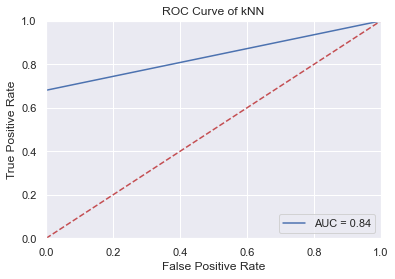

In [59]:
fpr, tpr, threshold = roc_curve(test_labels, knn_predicted_test_labels)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

#### 4) RANDOM FOREST CLASSIFIER

In [60]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
# predictions
y_pred = rfc.predict(X_test)

In [61]:
fraud_ = data[data["Class"] == 1]
valid_ = data[data["Class"] == 0]
print("Total fraud transactions: ",len(fraud_))
print("Total valid transactions: ",len(valid_))

Total fraud transactions:  473
Total valid transactions:  275190


In [62]:
n_outliers = len(fraud_)
n_errors = (y_pred != Y_test ).sum()
print("Random Forest Classifier")

# calculating accuray of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy : ",accuracy)
 
# calculating precision of the model
precision = precision_score(Y_test, y_pred)
print("Precision: ",precision)

# calculating recall score of the model
recall = recall_score(Y_test, y_pred)
print("Recall: ",recall)

# calculating f1-score of the model
f1 = f1_score(Y_test, y_pred)
print("F1-Score: ",f1)
 

Random Forest Classifier
Accuracy :  0.9994679500356716
Precision:  0.8709677419354839
Recall:  0.7941176470588235
F1-Score:  0.8307692307692308


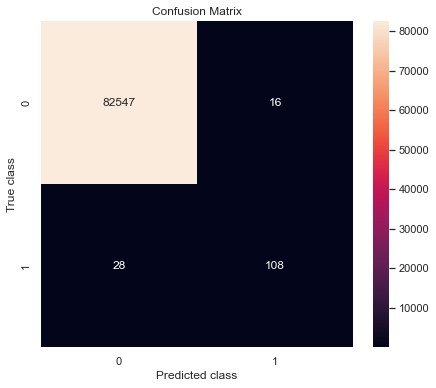

In [63]:
# printing the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize = (7, 6))
sns.heatmap(conf_matrix, annot=True, fmt ="d");
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [64]:
rfc_pred_test_prob = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(Y_test, rfc_pred_test_prob)
rfc_auc = roc_auc_score(Y_test, rfc_pred_test_prob)
rfc_auc

0.9571124741819259

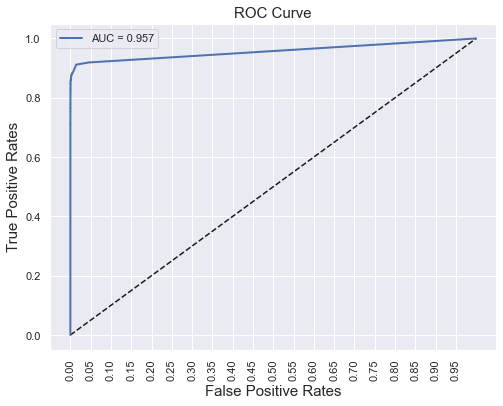

In [65]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % rfc_auc)

In [66]:
Results = pd.DataFrame(np.zeros((4,5)), columns=['ACCURACY', 'PRECISION', 'F1-SCORE', 'RECALL', 'AUC'])
Results.index=['Logistic Regression (LR)', 'Naive Bayes(NB)' , 'K-Nearest Neighbour(KNN)' ,'Random Forest (RF)']
Results

,ACCURACY,PRECISION,F1-SCORE,RECALL,AUC
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Naive Bayes(NB),0.0,0.0,0.0,0.0,0.0
K-Nearest Neighbour(KNN),0.0,0.0,0.0,0.0,0.0
Random Forest (RF),0.0,0.0,0.0,0.0,0.0


In [67]:
Results.iloc[0]['ACCURACY']= lr_accuracy * 100 
Results.iloc[0]['PRECISION']= lr_precision * 100 
Results.iloc[0]['F1-SCORE']= lr_f1 * 100 
Results.iloc[0]['RECALL']= lr_recall * 100 
Results.iloc[0]['AUC']= lr_auc * 100 


In [68]:
Results.iloc[1]['ACCURACY']= accuracy * 100 
Results.iloc[1]['PRECISION']= precision * 100 
Results.iloc[1]['F-1 SCORE']= f1 * 100 
Results.iloc[1]['RECALL']= nb_recall * 100 
Results.iloc[1]['AUC']= nb_auc * 100 


In [69]:
Results.iloc[2]['ACCURACY']= kmeans_accuracy_score * 100 
Results.iloc[2]['PRECISION']= kmeans_precison_score * 100 
Results.iloc[2]['F1-SCORE']= kmeans_f1_score * 100 
Results.iloc[2]['RECALL']= kmeans_recall_score * 100 
Results.iloc[2]['AUC']= roc_auc * 100 



In [70]:
Results.iloc[3]['ACCURACY']= accuracy * 100 
Results.iloc[3]['PRECISION']= precision * 100 
Results.iloc[3]['F1-SCORE']= f1 * 100 
Results.iloc[3]['RECALL']= recall * 100 
Results.iloc[3]['AUC']= rfc_auc * 100 


In [71]:
Results

,ACCURACY,PRECISION,F1-SCORE,RECALL,AUC
Logistic Regression (LR),98.829490,10.975610,19.467554,86.029412,95.360072
Naive Bayes(NB),99.946795,87.096774,0.000000,100.000000,50.053898
K-Nearest Neighbour(KNN),79.337102,0.441426,0.875863,55.319149,84.030244
Random Forest (RF),99.946795,87.096774,83.076923,79.411765,95.711247
